In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns


In [2]:
file_path = "monkeytype_0202_raw.csv"
df_raw = pd.read_csv(file_path, sep="|")
df_raw.head()

,_id,isPb,wpm,acc,rawWpm,consistency,charStats,mode,mode2,quoteLength,...,punctuation,numbers,language,funbox,difficulty,lazyMode,blindMode,bailedOut,tags,timestamp
0,63db4c64863ed52530e31e7c,NaN,119.12,98.68,119.12,83.59,"149,0,0,0",time,15,NaN,...,False,False,english,none,normal,False,False,False,NaN,1675316324600
1,63db4c53863ed52530e31e02,NaN,111.20,99.29,111.20,76.97,"139,0,0,0",time,15,NaN,...,False,False,english,none,normal,False,False,False,NaN,1675316307518
2,63db4c43863ed52530e31d86,NaN,93.60,98.32,93.60,69.66,"117,0,0,0",time,15,NaN,...,False,False,english,none,normal,False,False,False,NaN,1675316291184
3,63db4963863ed52530dd9c5e,NaN,101.60,98.50,104.80,79.88,"127,1,0,0",time,15,-1.0,...,False,False,english,none,normal,False,False,False,NaN,1675315555000
4,63db3c4e863ed52530ccf64e,NaN,100.80,91.22,105.60,74.13,"126,1,1,0",time,15,-1.0,...,False,False,english,none,normal,False,False,False,NaN,1675312206000


In [5]:
df_raw.columns

Index(['_id', 'isPb', 'wpm', 'acc', 'rawWpm', 'consistency', 'charStats',
       'mode', 'mode2', 'quoteLength', 'restartCount', 'testDuration',
       'afkDuration', 'incompleteTestSeconds', 'punctuation', 'numbers',
       'language', 'funbox', 'difficulty', 'lazyMode', 'blindMode',
       'bailedOut', 'tags', 'timestamp'],
      dtype='object')

In [7]:
use_col_values = ['wpm', 'acc', 'rawWpm', 'consistency', 'charStats', 'testDuration', 'language', 'timestamp']
df_clean = df_raw[use_col_values]
df_clean.head()

,wpm,acc,rawWpm,consistency,charStats,testDuration,language,timestamp
0,119.12,98.68,119.12,83.59,"149,0,0,0",15.01,english,1675316324600
1,111.20,99.29,111.20,76.97,"139,0,0,0",15.00,english,1675316307518
2,93.60,98.32,93.60,69.66,"117,0,0,0",15.00,english,1675316291184
3,101.60,98.50,104.80,79.88,"127,1,0,0",15.00,english,1675315555000
4,100.80,91.22,105.60,74.13,"126,1,1,0",15.00,english,1675312206000


In [8]:
df_clean.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 893 entries, 0 to 892
Data columns (total 8 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   wpm           893 non-null    float64
 1   acc           893 non-null    float64
 2   rawWpm        893 non-null    float64
 3   consistency   893 non-null    float64
 4   charStats     893 non-null    object 
 5   testDuration  893 non-null    float64
 6   language      893 non-null    object 
 7   timestamp     893 non-null    int64  
dtypes: float64(5), int64(1), object(2)
memory usage: 55.9+ KB


In [13]:
from datetime import datetime

date_time = datetime.fromtimestamp(df_clean.timestamp[0])

ValueError: year 55058 is out of range

In [21]:
date_time = datetime.fromtimestamp(1675316324.600)
print(date_time)


2023-02-02 13:38:44.600000


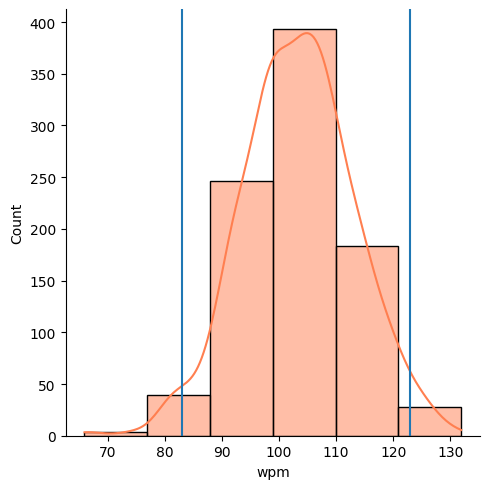

In [41]:
sns.displot(data=df_clean, x="wpm", kde=True, color="coral", bins=6)
plt.axvline(83)
plt.axvline(123)


In [32]:
from inspect import signature

sig = signature(sns.displot)
str(sig)

"(data=None, *, x=None, y=None, hue=None, row=None, col=None, weights=None, kind='hist', rug=False, rug_kws=None, log_scale=None, legend=True, palette=None, hue_order=None, hue_norm=None, color=None, col_wrap=None, row_order=None, col_order=None, height=5, aspect=1, facet_kws=None, **kwargs)"

In [35]:
df_clean.describe()

,wpm,acc,rawWpm,consistency,testDuration,timestamp
count,893.000000,893.000000,893.000000,893.000000,893.000000,8.930000e+02
mean,103.353046,94.997648,110.626047,75.925935,15.001277,1.674191e+12
std,9.766628,3.396032,9.524320,6.528188,0.010219,5.577125e+08
min,65.930000,82.310000,72.200000,48.950000,15.000000,1.673511e+12
25%,97.530000,93.060000,104.000000,71.810000,15.000000,1.673612e+12
50%,103.200000,95.480000,110.400000,76.120000,15.000000,1.674129e+12
75%,109.600000,97.780000,116.800000,80.510000,15.000000,1.674549e+12
max,131.910000,100.000000,137.600000,90.780000,15.290000,1.675316e+12


In [36]:
df_clean.wpm.value_counts()

97.60     34
104.00    34
93.60     31
100.00    31
103.20    28
          ..
117.52     1
131.91     1
91.14      1
83.14      1
65.93      1
Name: wpm, Length: 107, dtype: int64